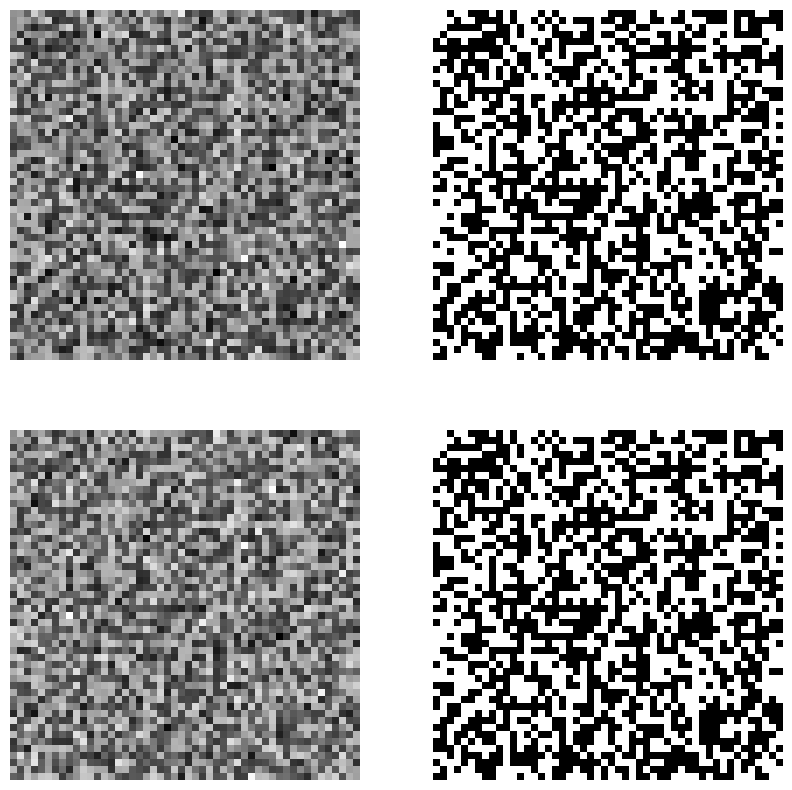

In [11]:

from matplotlib import pyplot as plt
from skimage.io import imread

barcodeA = imread('MGBarcodesA/2Dbarcode1.pgm')
barcodeAOri = imread('MGBarcodesA/OriginalCode.pgm')

barcodeF = imread('MGBarcodesF/2Dbarcode1.pgm')
barcodeFOri = imread('MGBarcodesF/OriginalCode.pgm')

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
axes[0, 0].imshow(barcodeA, cmap="gray")
axes[0, 0].axis('off')
axes[0, 1].imshow(barcodeAOri, cmap="gray")
axes[0, 1].axis('off')

axes[1, 0].imshow(barcodeF, cmap="gray")
axes[1, 0].axis('off')
axes[1, 1].imshow(barcodeFOri, cmap="gray")
axes[1, 1].axis('off')
plt.show()

# Attaquant

In [274]:

import numpy as np


def f(zi, mu, sigma2):
    return (1 / (np.sqrt(2 * np.pi) * sigma2)) * np.exp(-(zi - mu) ** 2 / (2 * sigma2))


def EMAlg(scan, N):
    K = 2
    alphas = np.ones(K) / K
    mus = np.random.choice(scan, K)
    sigmas = np.ones(K)
    scan_len = len(scan)

    for step in trange(N):
        pnums = np.zeros((scan_len, K))
        for k in range(K):
            pnums[:, k] = alphas[k] * f(scan, mus[k], sigmas[k])

        pnums /= np.sum(pnums, axis=1, keepdims=True)

        for k in range(K):
            p_sum = np.sum(pnums[:, k])

            mus[k] = np.sum(scan * pnums[:, k]) / p_sum
            sigmas[k] = np.sum(pnums[:, k] * (scan - mus[k]) ** 2) / p_sum
            alphas[k] = p_sum / scan_len

    return alphas, mus, sigmas

In [288]:
test_scan = barcodeA.flatten() / 256
alphas, mus, sigmas = EMAlg(test_scan, 1000000)

print(alphas, mus, sigmas)

100%|██████████| 1000000/1000000 [03:12<00:00, 5192.33it/s]

[0.50041835 0.49958165] [0.41152264 0.25273825] [0.00173177 0.0016537 ]


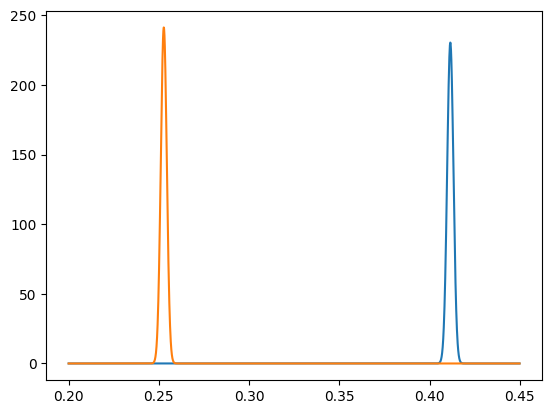

In [289]:
from scipy.stats import norm

x_axis = np.arange(0.20, 0.45, 0.0001)

plt.plot(x_axis, norm.pdf(x_axis, mus[0], sigmas[0]))
plt.plot(x_axis, norm.pdf(x_axis, mus[1], sigmas[1]))
plt.show()

0.3321304468566361
97.84%


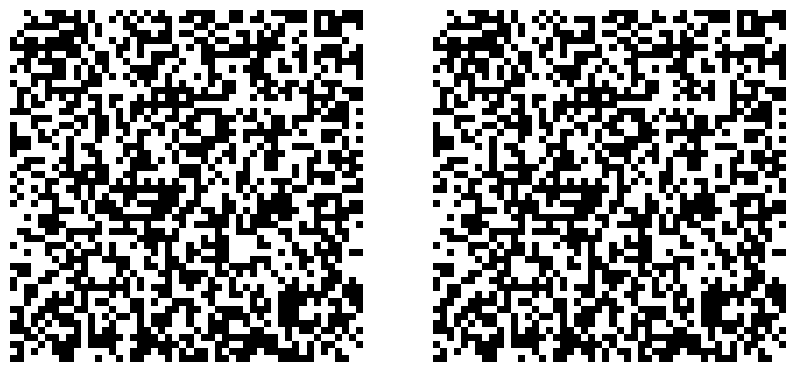

In [292]:
seuil = np.mean(mus)
tmp_sigs = sigmas / np.sum(sigmas)
#seuil = (max(mus) - min(mus)) / tmp_sigs[0]
print(seuil)

test_orig = np.where(test_scan > seuil, 255, 0).reshape(50, 50)

fig, axes = plt.subplots(ncols=2, figsize=(10, 10))
axes[0].imshow(test_orig, cmap="gray")
axes[0].axis('off')
axes[1].imshow(barcodeAOri, cmap="gray")
axes[1].axis('off')

print(f"{len(np.where(test_orig.flatten() == barcodeAOri.flatten())[0]) / 50 / 50 * 100}%")

# 2